In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot as plt
from sklearn import metrics

from sklearn.mixture import GaussianMixture

(5320, 3)


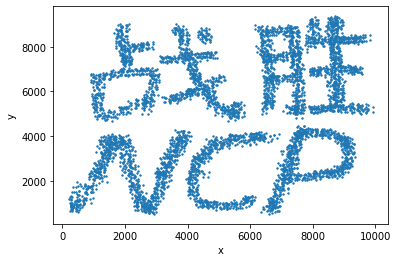

In [2]:
df_ncp = pd.read_csv("/Users/zhuangbin/OneDrive/ProjectSpace/Jupyter/My Project/AI/data/战胜NCP.csv")

print(df_ncp.shape)
df_ncp.plot.scatter('x', 'y', s=2)

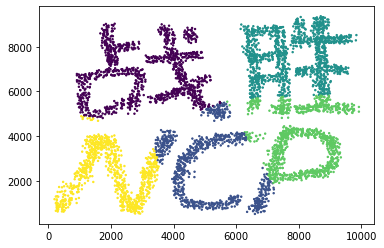

array([[3130.50540316, 6850.55029094],
       [5103.65875706, 2743.66553672],
       [7868.93605948, 7623.70929368],
       [8052.4888241 , 3937.98931001],
       [1993.60839161, 2272.9009324 ]])

In [3]:
# K均值法：n_clusters 聚类的的种类数；max_iter：最大迭代次数
kmeans = KMeans(n_clusters=5,max_iter=3000)
model = kmeans.fit(df_ncp.iloc[:,1:])

plt.scatter(df_ncp['x'],df_ncp['y'],c=model.labels_,s=2)
plt.show()

# 模型的中心点
model.labels_
model.cluster_centers_

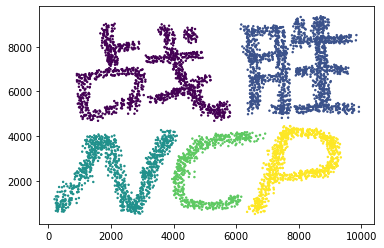

In [4]:
# DBSCAN
# 主要参数为：eps：聚类点之间的最大距离；min_samples：聚类的最少样本数量
dbscan = DBSCAN(eps=320, min_samples=20)
model = dbscan.fit(df_ncp.iloc[:, 1:])

plt.scatter(df_ncp['x'],df_ncp['y'],c=model.labels_,s=2)
plt.show()

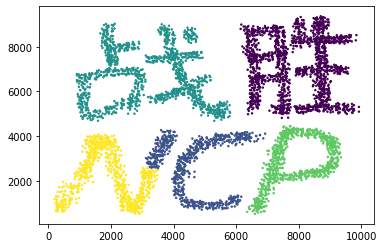

In [5]:
# Birch
# 效果貌似也不错
birch = Birch(n_clusters=5,threshold=0.5)
model = birch.fit(df_ncp.iloc[:, 1:])

plt.scatter(df_ncp['x'],df_ncp['y'],c=model.labels_,s=2)
plt.show()

In [32]:
# SpectralClustering
sc = SpectralClustering(n_clusters=5,eigen_solver='lobpcg')
model = sc.fit(df_ncp.iloc[:, 1:])

plt.scatter(df_ncp['x'],df_ncp['y'],c=model.labels_,s=2)
plt.show()


/usr/local/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


ValueError: expected 1-d or 2-d array or matrix, got array(None, dtype=object)

In [6]:
# 模型的标签情况
model.labels_

# 模型的评价
## 轮廓系数
metrics.silhouette_score(df_ncp.iloc[:, 1:], model.labels_)


0.44111334839298383

In [ ]:
# 高斯混合方法（但是没有掌握）
GMM = GaussianMixture(n_components=2)
model = GMM.fit(df_ncp.iloc[:, 1:])

In [7]:
model.weights_

AttributeError: 'Birch' object has no attribute 'weights_'

In [8]:
# Plot 3D
# 3D作图，并可视化评估

from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1, init='random'))]
fignum = 1
titles = [x[0] for x in estimators]

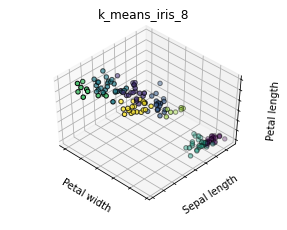

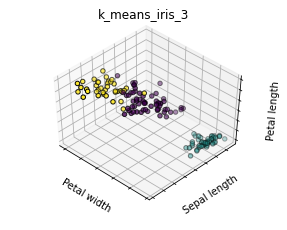

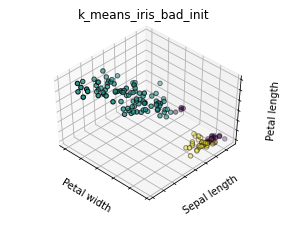

In [9]:
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=(0, 0, .95, 1), elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


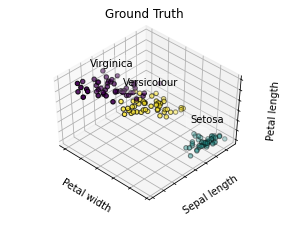

In [10]:
# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=(0, 0, .95, 1), elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()